In [6]:
from benchmark_demo.Benchmark import Benchmark
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.ResultsInterpreter import ResultsInterpreter
import pickle
import pandas as pd
import seaborn as sns


# import seaborn as sns
from benchmark_demo.utilstf import *
import matplotlib.pyplot as plt
from matplotlib import style	
# plt.style.use('tableau-colorblind10')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import string


In [7]:
# %matplotlib widget
# %matplotlib inline

In [8]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_component_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
print(benchmark.methods_ids)

True
['em_method', 'fri_method', 'brevdo_method', 'delaunay_triangulation', 'nils_method', 'pseudo_bayesian_method']


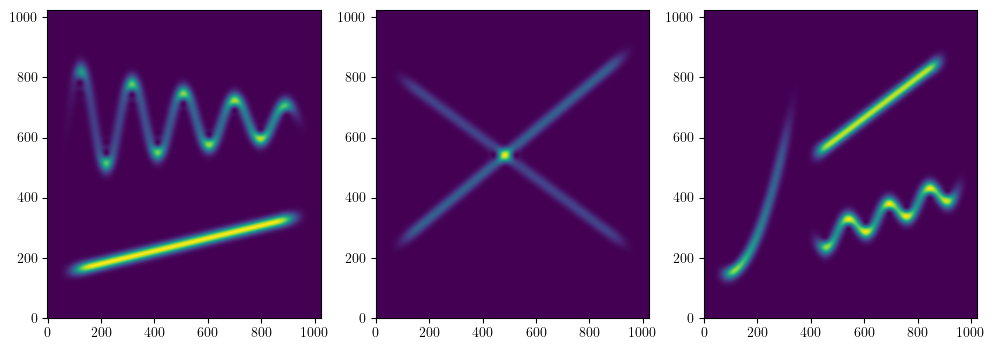

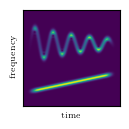

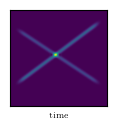

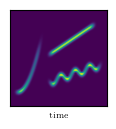

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

signal_id = benchmark.signal_ids
N = benchmark.N
sb = SignalBank(N, return_signal=True)
signal_dict = sb.generate_signal_dict()
Nsignals = len(signal_id)

Nfft = 2*N
g,_ = get_round_window(Nfft)

fig, axs = plt.subplots(1,Nsignals,figsize=(4*Nsignals,4))
S = []
for i in range(Nsignals):
    signal = signal_dict[signal_id[i]]()
    Saux, _ = get_spectrogram(signal, window = g)
    S.append(Saux)
    axs[i].imshow(Saux, origin='lower', aspect='auto')
    # component_box(signal, S, ax=axs[i])


for i in range(Nsignals):
    fig, axs = plt.subplots(1,1,figsize=(1.25,1.25))
    signal = signal_dict[signal_id[i]]()
    Saux, _ = get_spectrogram(signal, window = g)
    axs.imshow(Saux, origin='lower', aspect='auto')
    # axs.axis('off')
    fig.canvas.draw()
    axs.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)
    axs.set_xlabel('time', fontsize=6.0)
    if i == 0:
        axs.set_ylabel('frequency', fontsize=6.0)
    fig.savefig('signal_spectrogram_{}.pdf'.format(i), dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

In [10]:
from benchmark_demo.ResultsInterpreter import ResultsInterpreter

filename = None
if filename is None:
    filename = '../results/last_benchmark_component_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
# results = benchmark.results
ri = ResultsInterpreter(benchmark)
df = ri.get_benchmark_as_data_frame()
df = ri.rearrange_data_frame(df)

df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
# col_names[0:5] = ['Signal Id.', 'SNR', 'Method', 'Parameters', 'Iteration']
# df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameter']
df

True


ValueError: Length mismatch: Expected axis has 14 elements, new values have 13 elements

In [11]:
fig_w = 1.8
fig_h = 1.7
spsize = 0.5
signal_ids = np.unique(df['Signal_id'])
Nsignals = len(signal_ids)
fig, axs = plt.subplots(1,signal.total_comps,figsize=(1.5*Nsignals,1.5),sharey=True)
# for i,sid in enumerate(signal_ids):
#     fig, axs = plt.subplots(1,1, figsize=(fig_w,fig_h),)
#     df_aux = df[df['Signal_id']==sid]
#     signal = signal_dict[sid]()

#     axins = inset_axes(axs, width=spsize, height=spsize, loc=2) #loc=spectrogram_loc[i])
#     # axins.imshow(np.log(S), origin='lower')
#     axins.imshow(S[i], origin='lower')
#     axins.axis('off')
#     fig.canvas.draw()
#     axins.tick_params(axis='both', which='both', bottom=False, top=False, 
#                     labelbottom=False, right=False, left=False, labelleft=False)
                    
#     ri.get_snr_plot(df_aux, 
#                     x='SNRin', 
#                     y='QRF', 
#                     hue='Method', 
#                     axis = axs,
#                     ms = 4,
#                     linewidth=1.0,
#                     markerfacecolor = 'none')

#     # axs.get_legend().remove()
#     axs.set_aspect('auto')
#     # print(axs.get_xticks()[2])
#     axs.set_xticks([axs.get_xticks()[i] for i in [0,2,4,6,8]])
#     axs.set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
#     axs.set_yticks([-20,-10,0,10,20,30])
#     axs.set_yticklabels([-20,-10,0,10,20,30],fontsize=6.0)
#     # axs.set_xticklabels(, fontsize=6.0)
#     if i==0:
#         axs.set_ylabel(r'QRF (dB)', fontsize=6.0)
#     else:
#         axs.set_ylabel(r'')
#         axs.set_yticklabels([])
#         axs.tick_params(axis=u'y', which=u'both',length=0)
#         # axs.yaxis.set_major_locator(plt.NullLocator())

#     axs.set_xlabel(r'SNR (dB)', fontsize=6.0, labelpad=1)

#     axs.set_ylim([-20,32])
#     # axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
#     axs.grid(True, linestyle='--', zorder=0)
#     fig.savefig('qrf_signal_{}.pdf'.format(i), dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)


# # new_legends = (r'SST+RD',r'Contours',r'DT',r'ES',r'PB',r'T-Garrote',r'T-Hard')
# new_legends = (r'SST+RD',r'DT',r'FRI',r'PB',r'PB+SST')
# legendFig = plt.figure(figsize=(4*fig_w,0.3))
# # legendFig.set_size_inches((fig_size_w,fig_size_h))
# h,l = axs.get_legend_handles_labels()
# legendFig.legend(h,l,#new_legends, 
#             fontsize='xx-small', 
#             frameon=False, 
#             loc='center', 
#             ncol=6
#             )
# legendFig.canvas.draw()
# legendFig.savefig('legend_qrf_signal.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)
# legendFig.add_axes([0,0,0,0])

# plt.show()


NameError: name 'df' is not defined

In [ ]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_component_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
results = benchmark.results
df = benchmark.dic2df(results)
# df = pd.DataFrame(results)
df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
col_names[0:5] = ['Signal Id.', 'SNR', 'Method','Parameters', 'Iteration']
df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameters'] 
df

True


,Signal Id.,SNR,Method,Parameters,Iteration,Comp.0,Comp.1,Comp.2
0,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",0,-11.946167,-12.359447,NaN
1,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",1,-10.926082,-13.843709,NaN
2,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",2,-14.212493,-11.68398,NaN
3,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",3,-12.858171,-12.710285,NaN
4,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",4,-11.668493,-13.019663,NaN
...,...,...,...,...,...,...,...,...
2425,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], True)",5,10.76442,-2.678321,27.349968
2426,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], True)",6,12.23381,-2.590065,27.066984
2427,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], True)",7,10.442523,-2.709083,27.417197
2428,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], True)",8,10.519195,-2.677284,26.61388


McCrossingChirps
McDampedCos
McSyntheticMixture5


<Axes: >

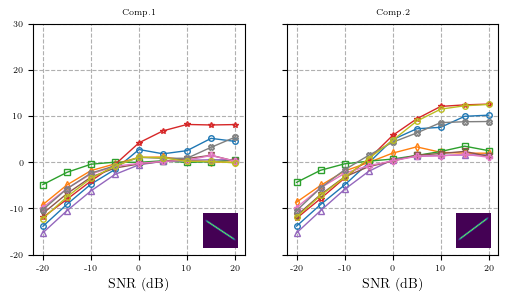

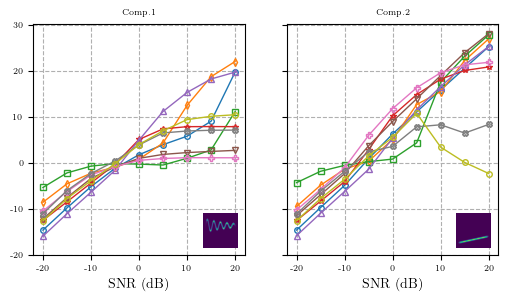

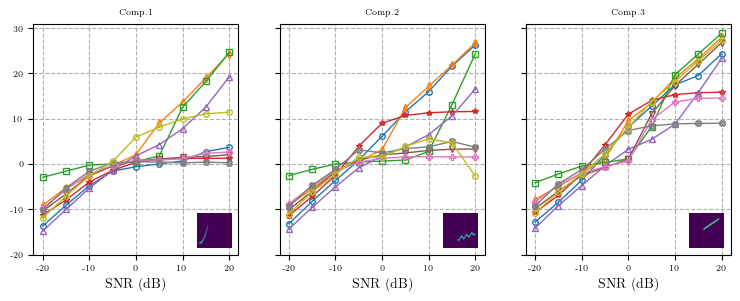

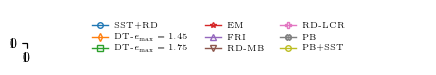

In [ ]:
from benchmark_demo.ResultsInterpreter import ResultsInterpreter as ri

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

spsize = 0.35

signal_ids = np.unique(df['Signal Id.'])

N = benchmark.N
sb = SignalBank(N, return_signal=True)
signal_dict = sb.generate_signal_dict()

for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()

    fig, axs = plt.subplots(1,
                            signal.total_comps,figsize=(3*signal.total_comps,3),
                            sharey=True)

    for j in range(signal.total_comps):
        ri.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = axs[j],
                    ms = 4,
                    linewidth=1.0,
                    markerfacecolor = 'none')

        S, _ = get_spectrogram(signal.comps[j],)
        axins = inset_axes(axs[j], width=spsize, height=spsize, loc=4) #loc=spectrogram_loc[i])
        # axins.imshow(np.log(S), origin='lower')
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)


        # Set the plot axis parameters.
        axs[j].set_xticks([axs[j].get_xticks()[i] for i in [0,2,4,6,8]])
        axs[j].set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
        axs[j].set_yticks([-20,-10,0,10,20,30])
        axs[j].set_yticklabels([-20,-10,0,10,20,30],fontsize=6.0)
        # axs[j].get_legend().remove()
        # axs[j].set_aspect('auto')
        axs[j].set_ylabel('')
        axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
        axs[j].grid(True, linestyle='--', zorder=0)

new_legends = (r'SST+RD',r'DT-$e_{\max}=1.45$',r'DT-$e_{\max}=1.75$',r'EM',r'FRI',r'RD-MB',r'RD-LCR',r'PB',r'PB+SST')
legendFig = plt.figure(figsize=(3*fig_w,0.3))
# legendFig.set_size_inches((fig_size_w,fig_size_h))
h,l = axs[j].get_legend_handles_labels()
legendFig.legend(h, new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=3,
            )
legendFig.canvas.draw()
legendFig.add_axes([0,0,0,0])  

McCrossingChirps
McDampedCos
McSyntheticMixture5


<Axes: >

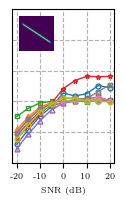

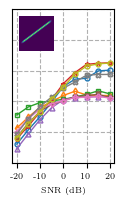

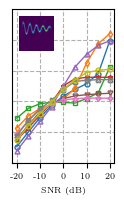

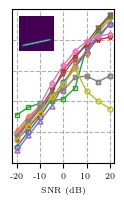

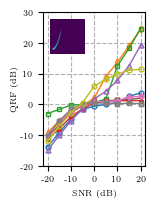

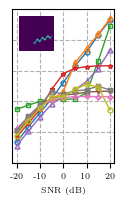

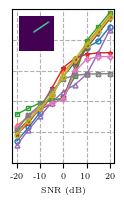

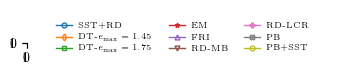

In [ ]:
signal = signal_dict['McSyntheticMixture5']()
df_aux = df[df['Signal Id.']=='McSyntheticMixture5']

fig_w = 1.32
fig_h = 2.0

for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()

    for j in range(signal.total_comps):
        fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))

        ri.get_snr_plot(df_aux, 
                        x='SNR', 
                        y='Comp.{}'.format(j), 
                        hue='Method', 
                        axis = ax,
                        ms = 3.5,
                        linewidth=1.0,
                        markerfacecolor = 'none',
                        )
                        # linestyles='-',
                        # scale=0.4,
                        # errwidth=0,
                        # # markers=['o', 'v', 's', '+'],
                        # markers = {'facecolor':'none',}
                        # )
        # plt.setp(ggg.collections, alpha=.3) #for the markers
        # plt.setp(ggg.lines, alpha=.3)
        # Include an spectrogram of the component
        S, _ = get_spectrogram(signal.comps[j],)
        axins = inset_axes(ax, width=spsize, height=spsize, loc=2) #loc=spectrogram_loc[i])
        # axins.imshow(np.log(S), origin='lower')
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)

        # Set the plot axis parameters.
        ax.set_xticks([ax.get_xticks()[i] for i in [0,2,4,6,8]])
        ax.set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
        ax.set_yticks([-20,-10,0,10,20,30])
        ax.set_yticklabels([-20,-10,0,10,20,30],fontsize=6.0)

        
        if sid == 'McSyntheticMixture5' and j==0:
            ax.set_ylabel(r'QRF (dB)', fontsize=6.0,labelpad=1)
        else:
            ax.set_ylabel(r'')
            ax.set_yticklabels([])
            ax.tick_params(axis=u'y', which=u'both',length=0)
            # ax.yaxis.set_major_locator(plt.NullLocator())

        ax.set_ylim([-20,30])    
        ax.set_xlabel(ax.get_xlabel(), fontsize=6.0)
        # ax.set_title('Component {}'.format(j+1), fontsize=6.0)
        # ax.get_legend().remove()
        ax.grid(True,linestyle='--', zorder=0)
        fig.savefig('qrf_{}_{}.pdf'.format(sid,j), dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

new_legends = (r'SST+RD',r'DT-$e_{\max}=1.45$',r'DT-$e_{\max}=1.75$',r'EM',r'FRI',r'RD-MB',r'RD-LCR',r'PB',r'PB+SST')
legendFig = plt.figure(figsize=(3*fig_w,0.3))
# legendFig.set_size_inches((fig_size_w,fig_size_h))
h,l = ax.get_legend_handles_labels()
legendFig.legend(h,new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=3,
            )
legendFig.canvas.draw()
legendFig.add_axes([0,0,0,0])    

In [ ]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_inst_frequency'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
results = benchmark.results
df = benchmark.dic2df(results)
# df = pd.DataFrame(results)
df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
col_names[0:5] = ['Signal Id.', 'SNR', 'Method', 'Parameters', 'Iteration']
df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameters']
df

True


,Signal Id.,SNR,Method,Parameters,Iteration,Comp.0,Comp.1,Comp.2
0,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",0,0.049888,0.007507,NaN
1,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",1,0.031349,0.0098,NaN
2,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",2,0.059048,0.006106,NaN
3,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",3,0.05242,0.009916,NaN
4,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",4,0.067433,0.006884,NaN
...,...,...,...,...,...,...,...,...
2425,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], [],...",5,0.001555,0.034964,0.000016
2426,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], [],...",6,0.001728,0.032782,0.000022
2427,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], [],...",7,0.001724,0.034115,0.00003
2428,McSyntheticMixture5,20,"pseudo_bayesian_method-([], True, [], [], [], ...","([], True, [], [], [], [], [], [], [], [], [],...",8,0.001296,0.034573,0.000017


In [ ]:
print(np.unique(df['Method']))

['brevdo_method-([], [], [], [], [], [], True)'
 "delaunay_triangulation-{'LB': 1.45, 'grouping': True, 'return_instf': True}"
 "delaunay_triangulation-{'LB': 1.75, 'grouping': True, 'return_instf': True}"
 'em_method-([], [], [], [], [], [], [], True)'
 'fri_method-([], [], [], [], [], [], [], True)'
 'nils_method-([], [], 1, [], [], [], True)'
 'nils_method-([], [], 2, [], [], [], True)'
 'pseudo_bayesian_method-([], False, [], [], [], [], [], [], [], [], [], True)'
 'pseudo_bayesian_method-([], True, [], [], [], [], [], [], [], [], [], True)']


McCrossingChirps
McDampedCos
McSyntheticMixture5


<Axes: >

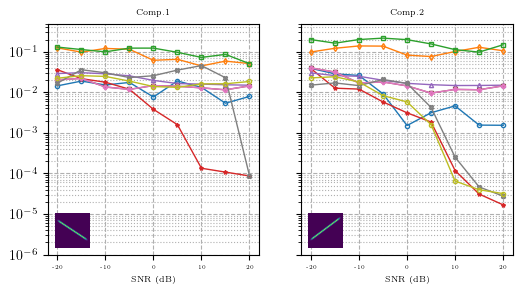

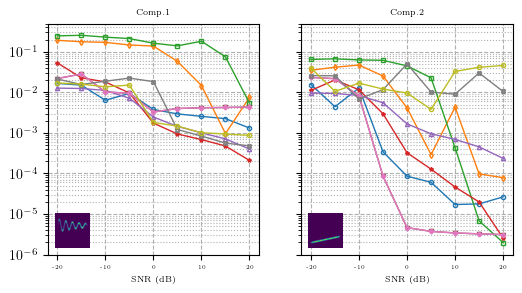

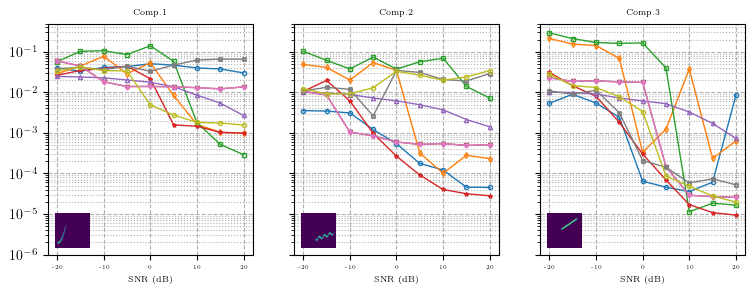

<Figure size 640x480 with 0 Axes>

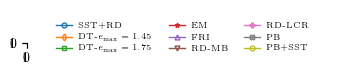

In [ ]:
from benchmark_demo.ResultsInterpreter import ResultsInterpreter as ri

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

signal_ids = np.unique(df['Signal Id.'])

for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()

    fig, axs = plt.subplots(1,
                            signal.total_comps,figsize=(3*signal.total_comps,3),
                            sharey=True)

    for j in range(signal.total_comps):
        ri.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = axs[j],
                    ms = 3,
                    linewidth=1.0,
                    markerfacecolor = 'none',
                    plot_type='semilogy')

        S, _ = get_spectrogram(signal.comps[j])
        axins = inset_axes(axs[j], width=spsize, height=spsize, loc=3) #loc=spectrogram_loc[i])
        # axins.imshow(np.log(S), origin='lower')
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)


        axs[j].set_ylim([1e-6,0.5])
        # Set the plot axis parameters.
        axs[j].set_xticks([axs[j].get_xticks()[i] for i in [0,2,4,6,8]])
        axs[j].set_xticklabels([-20,-10,0,10,20],fontsize=4.0)
        # ax.set_yticks([-20,-10,0,10,20,30])

        # axs.set_xticklabels(, fontsize=6.0)
        # if j==0:
        #     axs[j].set_ylabel(r'MSE', fontsize=6.0,labelpad=1)
        #     axs[j].set_yticklabels(axs[j].get_yticklabels(),fontsize=6.0)
        # else:
        #     axs[j].set_ylabel(r'')
        #     axs[j].set_yticklabels([],fontsize=6.0)
        #     axs[j].tick_params(axis=u'y', which=u'both',length=0)
            # ax.yaxis.set_major_locator(plt.NullLocator())

        axs[j].set_xlabel(axs[j].get_xlabel(), fontsize=6.0)
        axs[j].set_title('Component {}'.format(j+1), fontsize=6.0)
        # ax.get_legend().remove()
        axs[j].grid(True,linestyle='--', zorder=0)
        axs[j].grid(True,which='minor',linestyle=':', zorder=0)
    
        # axs[j].get_legend().remove()
        # axs[j].set_aspect('auto')
        axs[j].set_ylabel('')
        axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
        axs[j].grid(True, linestyle='--', zorder=0)

new_legends = (r'SST+RD',r'DT-$e_{\max}=1.45$',r'DT-$e_{\max}=1.75$',r'EM',r'FRI',r'RD-MB',r'RD-LCR',r'PB',r'PB+SST')
legendFig = plt.figure()
# legendFig.set_size_inches((fig_size_w,fig_size_h))
legendFig = plt.figure(figsize=(3*fig_w,0.3))
legendFig.legend(h,new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=3,
            )
legendFig.canvas.draw()
# legendFig.savefig('legend_denoising.pdf', dpi=900, transparent=False, bbox_inches='tight',pad_inches = 0)
legendFig.add_axes([0,0,0,0])         

McCrossingChirps
McDampedCos
McSyntheticMixture5


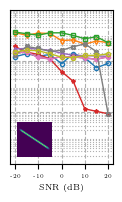

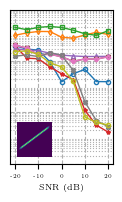

<Figure size 640x480 with 0 Axes>

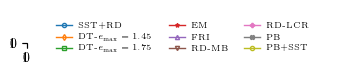

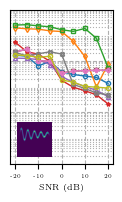

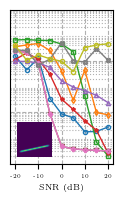

<Figure size 640x480 with 0 Axes>

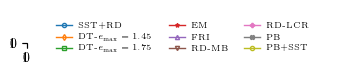

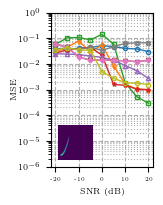

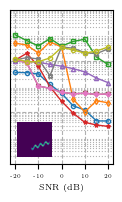

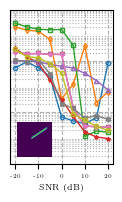

<Figure size 640x480 with 0 Axes>

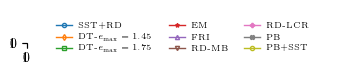

In [ ]:
for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()
    # df_aux = df[df['Signal Id.']==sid]
    for j in range(signal.total_comps):
        fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))

        ri.get_snr_plot(df_aux, 
                        x='SNR', 
                        y='Comp.{}'.format(j), 
                        hue='Method', 
                        axis = ax,
                        ms = 3,
                        linewidth=1.0,
                        markerfacecolor = 'none',
                        plot_type='semilogy')
                        # linestyles='-',
                        # scale=0.4,
                        # errwidth=0,
                        # # markers=['o', 'v', 's', '+'],
                        # markers = {'facecolor':'none',}
                        # )
        # plt.setp(ggg.collections, alpha=.3) #for the markers
        # plt.setp(ggg.lines, alpha=.3)
        # Include an spectrogram of the component
        S, _ = get_spectrogram(signal.comps[j],)
        axins = inset_axes(ax, width=spsize, height=spsize, loc=3) #loc=spectrogram_loc[i])
        # axins.imshow(np.log(S), origin='lower')
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)
        
        
        # Set the plot axis parameters.
        ax.set_xticks([ax.get_xticks()[i] for i in [0,2,4,6,8]])
        ax.set_xticklabels([-20,-10,0,10,20],fontsize=4.0)
        # ax.set_yticks([-20,-10,0,10,20,30])
        
        
        if sid=='McSyntheticMixture5' and j==0:
            ax.set_ylabel(r'MSE', fontsize=6.0,labelpad=1)
            # ax.set_yticklabels(fontsize=6.0)
            ax.yaxis.set_tick_params(labelsize=6.0)
        else:
            ax.set_yticklabels([])
            ax.tick_params(axis=u'y', which=u'both',length=0)
            # ax.yaxis.set_major_locator(plt.NullLocator())
        ax.set_ylim([1e-6,1])

        ax.set_xlabel(ax.get_xlabel(), fontsize=6.0)
        # ax.set_title('Component {}'.format(j+1), fontsize=6.0)
        # ax.get_legend().remove()
        ax.grid(True,linestyle='--', zorder=0)
        ax.grid(True,which='minor',linestyle=':', zorder=0)
        
        fig.savefig('instf_{}_{}.pdf'.format(sid,j), dpi=900, transparent=False, bbox_inches='tight',pad_inches = 0)  

    h,l = ax.get_legend_handles_labels()
    new_legends = (r'SST+RD',r'DT-$e_{\max}=1.45$',r'DT-$e_{\max}=1.75$',r'EM',r'FRI',r'RD-MB',r'RD-LCR',r'PB',r'PB+SST')
    legendFig = plt.figure()
    # legendFig.set_size_inches((fig_size_w,fig_size_h))
    legendFig = plt.figure(figsize=(3*fig_w,0.3))
    legendFig.legend(h,new_legends, 
                fontsize='xx-small', 
                frameon=False, 
                loc='center', 
                ncol=3,
                )
    legendFig.canvas.draw()
    legendFig.savefig('legend_denoising.pdf', dpi=900, transparent=False, bbox_inches='tight',pad_inches = 0)
    legendFig.add_axes([0,0,0,0])  